In [ ]:
pip install sklearn

In [ ]:
pip install shap

In [ ]:
pip install termcolor

In [ ]:
pip install xgboost

In [ ]:
pip install graphviz

In [1]:
import numpy as np 
import pandas as pd
import os

In [2]:
import matplotlib.pyplot as plt # visualization
from matplotlib import rcParams # figure size
from termcolor import colored as cl # text customization

from sklearn.tree import DecisionTreeClassifier as dtc # tree algorithm
from sklearn.model_selection import train_test_split # splitting the data
from sklearn.metrics import accuracy_score, plot_roc_curve # model precision
from sklearn.tree import plot_tree # tree diagram
from sklearn import tree
import shap

import urllib

In [3]:
from commons.metrics import ks_table,best_cutoff, obtain_metrics


In [4]:
# Download the dataset
url = 'https://raw.githubusercontent.com/csaybar/Titanic/master/'
urllib.request.urlretrieve(url+'train.csv', 'train.csv')
urllib.request.urlretrieve(url+'test.csv', 'test.csv')

#Let’s read in and take a peek at the data.
basedataset = pd.read_csv('train.csv')
dataset_valid =  pd.read_csv('test.csv')

In [5]:
basedataset.rename(columns={'Survived': 'target'}, inplace=True)

basedataset.groupby(['target'], as_index=False).agg({"PassengerId":"count"})

,target,PassengerId
0,0,549
1,1,342


In [6]:
from sklearn.preprocessing import LabelEncoder
def clean_dataset(df, categorical_cols = None,canary=0, vars_to_drop=None):
    
    if vars_to_drop!=None:
        df.drop(vars_to_drop, axis=1, inplace=True)
    
    if categorical_cols != None:
        df[df.columns.difference(categorical_cols)] = df[df.columns.difference(categorical_cols)].astype('float')

        for c in categorical_cols:
            df[c] = df[c].astype('str')
            df[c] = df[c].fillna('undefined')

        for c in categorical_cols:
            label = LabelEncoder()
            label.fit(list(df[c].values))
            df.loc[:, c] = label.transform(list(df[c].values))
        df[df.columns.difference(categorical_cols)] = df[df.columns.difference(categorical_cols)].fillna(0)
    
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    cols_num = df.select_dtypes(include=numerics).columns
    
    #df['device_name'] = df['device_name'].map(lambda x : clean_text(x))
    #Excluyo el target para que no aplique transf. log

    #df[cols_num] = df[cols_num].applymap(lambda x: np.log1p(x))
    if canary>0:
        print('canary features')
        for c in range(1,canary):
            df['canary_{}'.format(c)] = np.random.uniform(0,1,len(df))
    
    return df


In [7]:
X = basedataset[basedataset.columns.difference(['target'])]
X = clean_dataset(X,categorical_cols=['Sex','Cabin','Embarked'],canary=3,vars_to_drop=['Name','Ticket'])
y = basedataset['target'].astype('int')

canary features



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [8]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [9]:

# X_var = df_sessions[feature_names].values # independent variable
# y_var = df_sessions['target'].values # dependent variable

# print(cl('X variable samples : {}'.format(X_var[:5]), attrs = ['bold']))
# print(cl('Y variable samples : {}'.format(y_var[:5]), attrs = ['bold']))

# X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.2, random_state = 0)

print(cl('X_train shape : {}'.format(X_train.shape), attrs = ['bold'], color = 'red'))
print(cl('X_test shape : {}'.format(X_test.shape), attrs = ['bold'], color = 'red'))
print(cl('y_train shape : {}'.format(y_train.shape), attrs = ['bold'], color = 'green'))
print(cl('y_test shape : {}'.format(y_test.shape), attrs = ['bold'], color = 'green'))


X_train shape : (623, 11)
X_test shape : (268, 11)
y_train shape : (623,)
y_test shape : (268,)


In [10]:
# plot decision tree
from numpy import loadtxt

from xgboost import XGBClassifier
from xgboost import plot_tree
#import matplotlib.pyplot as plt
# load data







from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
# Step 2: Make an instance of the Model
model_rf = RandomForestClassifier(n_estimators=10, max_depth=3)
model_rf.fit(X_train, y_train)
#model = LogisticRegression()
dtclf = DecisionTreeClassifier(max_depth = 3,random_state = 0)
model_dtclf = dtclf.fit(X_train, y_train)

# xgboost
xgb = XGBClassifier()
model_xgb = xgb.fit(X_train, y_train)

model = XGBClassifier()
model.fit(X_train, y_train)

# Extract the small tree
#tree_small = rf_small.estimators_[5]


pred_model = model.predict_proba(X_test)
y_pred_prob =pred_model[:,1]
y_pred = model.predict(X_test)

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[17:51:18] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:51:18] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


# metrics

In [11]:
ks_table(y_test,pred_model[:,1],decimal=1)

,prob_group,min_prob,max_prob,events,nonevents,event_rate,nonevent_rate,cum_eventrate,cum_noneventrate,TP,FP,TN,FN,Precision_(1),recall_(1),F1-score(1),Precision_(0),recall_(0),F1-score(0),KS
0,0.9,0.904084,0.999746,51,17,53.68%,9.83%,53.68%,9.83%,51,17,156,44,0.75,0.54,0.63,0.78,0.90,0.84,43.9
1,0.8,0.858215,0.876406,1,2,1.05%,1.16%,54.74%,10.98%,52,19,154,43,0.73,0.55,0.63,0.78,0.89,0.83,43.8
2,0.7,0.719568,0.799625,5,1,5.26%,0.58%,60.00%,11.56%,57,20,153,38,0.74,0.60,0.66,0.80,0.88,0.84,48.4
3,0.6,0.613151,0.699677,3,5,3.16%,2.89%,63.16%,14.45%,60,25,148,35,0.71,0.63,0.67,0.81,0.86,0.83,48.7
4,0.5,0.520850,0.592273,2,2,2.11%,1.16%,65.26%,15.61%,62,27,146,33,0.70,0.65,0.67,0.82,0.84,0.83,49.7
5,0.4,0.401887,0.492071,2,7,2.11%,4.05%,67.37%,19.65%,64,34,139,31,0.65,0.67,0.66,0.82,0.80,0.81,47.7
6,0.3,0.334153,0.365930,2,5,2.11%,2.89%,69.47%,22.54%,66,39,134,29,0.63,0.69,0.66,0.82,0.77,0.79,46.9
7,0.2,0.202080,0.297901,3,10,3.16%,5.78%,72.63%,28.32%,69,49,124,26,0.58,0.73,0.65,0.83,0.72,0.77,44.3
8,0.1,0.103073,0.198141,8,11,8.42%,6.36%,81.05%,34.68%,77,60,113,18,0.56,0.81,0.66,0.86,0.65,0.74,46.4
9,0.0,0.000099,0.097856,18,113,18.95%,65.32%,100.00%,100.00%,95,173,0,0,0.35,1.00,0.52,NaN,0.00,NaN,0.0


In [12]:
feature_names = X_test.columns

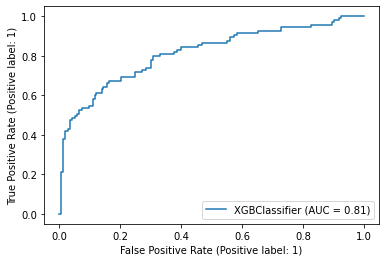

In [13]:

plot_roc_curve(model_xgb,X_test, y_test)

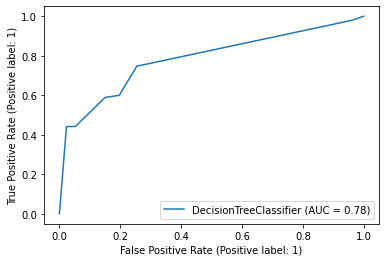

In [14]:
plot_roc_curve(model_dtclf,X_test, y_test)

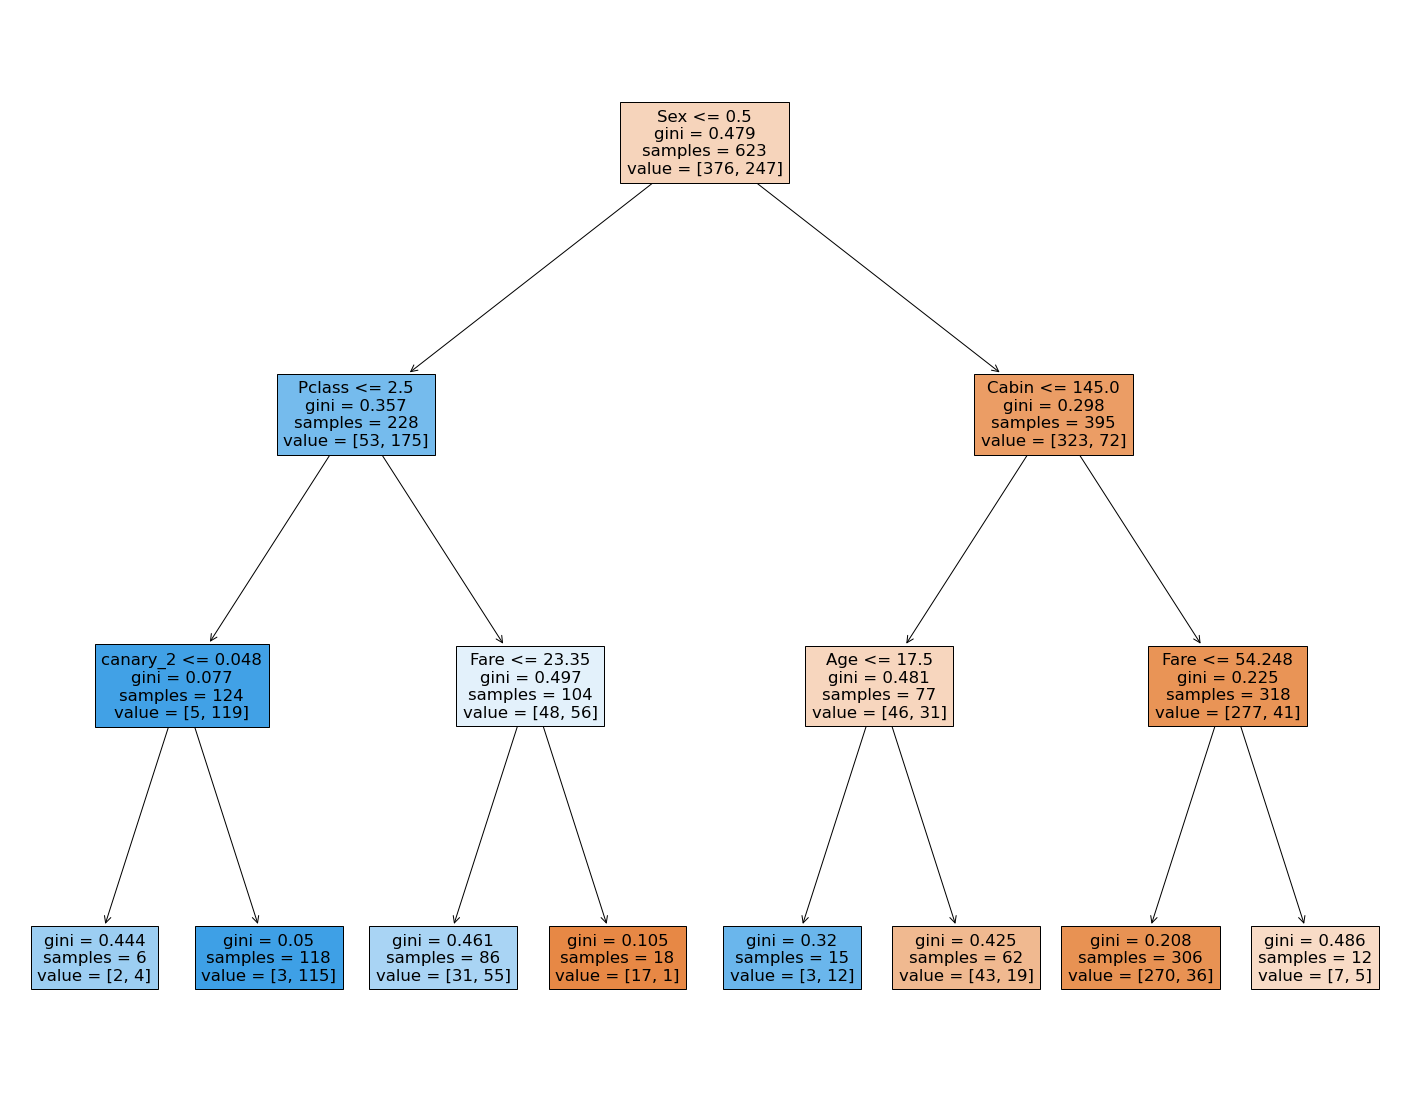

In [15]:
# plot tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtclf,
                   feature_names= feature_names,
                   filled=True)


In [16]:
# https://programmersought.com/article/89496068977/
# https://www.programmersought.com/article/661953544/
def ceate_feature_map(features):
    outfile = open('xgb.fmap', 'w')
    i = 0
    for feat in features:
        outfile.write('{0}\t{1}\tq\n'.format(i, feat))
        i = i + 1
    outfile.close()
ceate_feature_map(feature_names)#Feature name list

#fig, ax = plt.subplots(figsize=(20, 500))  # whatever size you want
fig,ax = plt.subplots(figsize=(20, 500))
fig.set_size_inches(60,30)
plot_tree(xgb,ax = ax,rankdir='LR',fmap='xgb.fmap')
plt.savefig('tree_visualization.png')

# shap

In [17]:
# https://github.com/slundberg/shap
# https://slundberg.github.io/shap/notebooks/NHANES%20I%20Survival%20Model.html

In [18]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model_xgb)
shap_values = explainer(X[feature_names])
#shap_values = explainer.shap_values(df_sessions[feature_names])


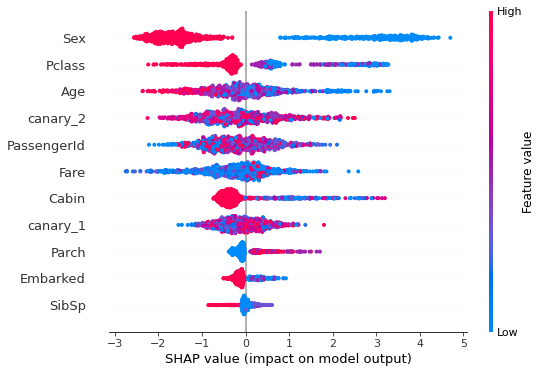

In [19]:
shap.summary_plot(shap_values, X[feature_names])

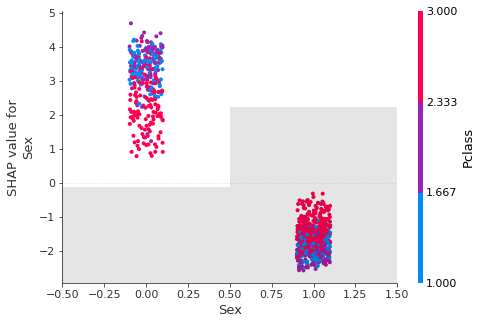

In [22]:
# create a dependence scatter plot to show the effect of a single feature across the whole dataset
shap.plots.scatter(shap_values[:,"Sex"], color=shap_values)

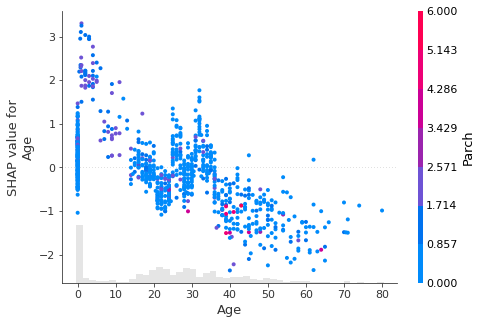

In [23]:
shap.plots.scatter(shap_values[:,"Age"], color=shap_values)

## detail by prediction or row

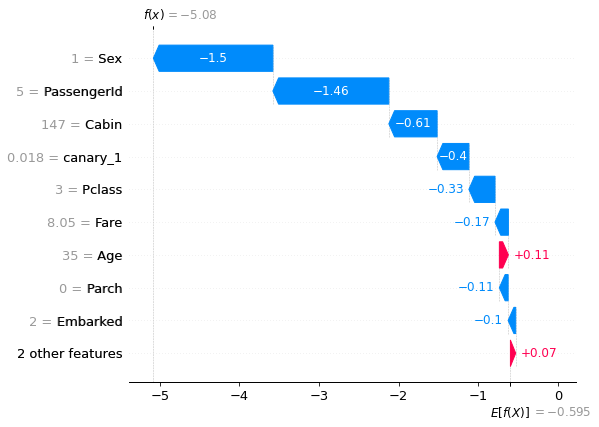

In [27]:
# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[4])

In [26]:
# visualize the first prediction's explanation with a force plot
shap.initjs()
shap.plots.force(shap_values[0])

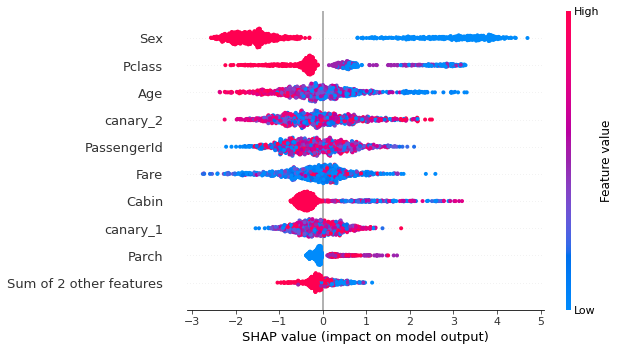

In [24]:
shap.plots.beeswarm(shap_values)

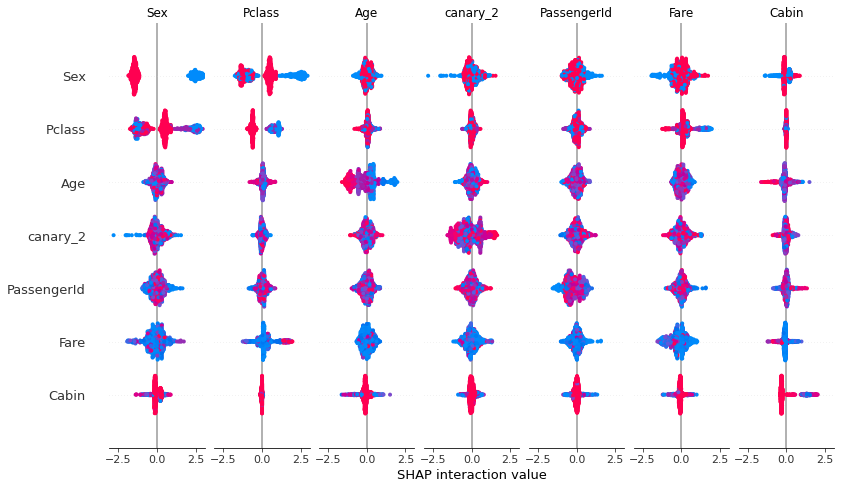

In [25]:
shap_interaction_values = shap.TreeExplainer(model).shap_interaction_values(X[feature_names].iloc[:2000,:])
shap.summary_plot(shap_interaction_values, X[feature_names].iloc[:2000,:])